# Decision trees


### Decision tree
- non-parametric supervised learning method used for classification and regression
- directed graph
- nodes corresponds to some tests on attributes
- branch represents an outcome of the test
- leaf corresponds to a class label

<img src="weather1.png">
<img src="weather2.png">



### History of decision trees

- 1960's
    - 1966: Hunt, colleagues in psychology used full search decision tree methods to model human concept learning
- 1970’s
    - 1977: Breiman, Friedman, colleagues in statistics developed simultaneously CART (Classification And Regression Trees) algorithm
    - 1979: Quinlan’s first work with prototype of ID3 (based on information theory)
- 1980’s
    - 1984: first mass publication of CART software (now in many commercial codes)
    - 1986: Quinlan’s landmark paper on ID3
    - Variety of improvements: coping with noise, continuous attributes, missing data
- 1990’s
    - 1993: Quinlan’s updated algorithm, C4.5
    - More pruning, overfitting control heuristics (C5.0, etc.)
    
<img src="ross.png">

### Ross Quinlan
-  PhD in Computer Science at the University of Washington in 1968
-  developed several algorithms: ID3,C4.5, C5.0, FOIL(first-order inductive learner)


#### CART
- acronym for Classification And Regression Trees
- introduced by Leo Breiman
- tree algorithm based on a numerical splitting criterion
- uses Gini Index


#### ID3
- acronym for Iterative Dichotomiser 3 algorithm
- attempts to create the smallest decision tree possible
- expects nominal features and nominal target values
- uses Information Gain 

#### C4.5
- improved version of ID3
- discrete and continuous attributes
- missing attribute values
- attributes with differing costs
- pruning trees (replacing irrelevant branches with leaf nodes)
- uses Information Gain 

#### C5.0
- higher memory efficiency
- smaller decision trees
- ability to weight different attributes




### Advantages of decision trees
- can be used to solve classification and regression problems 
- easy to build 
- intuitive to understand
- can be visualize
- can be used to model non-linear functions
- non-parametric method: no assumptions about the space distribution / classifier structure
- popular in many real world problems

### Disadvantages
- suffer from overfitting
- small variation in data can result in the different decision tree (use  bagging or boosting)
- significantly biased when trained imbalance dataset

### Applications
- credit scoring
- crime risk
- medical diagnosis
- failure prediction
- marketing

#### Splitting
- process of dividing a node into two or more sub-nodes

#### Stopping criterion
- defines when should one stop growing the branch of the tree

#### Pruning
- process of removing sub-nodes of a decision node

### How do we select the splitting attribute( four algorithms)
- Gini Index (CART)
- Chi-Square
- Information Gain (ID3, C4.5)
- Reduction in Variance

<b>Remark:</b>Goodness / (im)purity function = measures how well a given attribute separates the input
examples into two uniform groups

#### Gini Index (Example)

<img src="gini1.png">
<img src="gini2.png">
<img src="gini3.png">
<img src="gini4.png">
<img src="gini5.png">
<img src="gini6.png">
<img src="gini7.png">
<img src="gini8.png">


#### Information Gain (Example)

Entropy:
<img src="entropy1.png">
Information Gain:
<img src="IG1.png">
Example:
<img src="IG2.png">
<img src="IG3.png">
<img src="IG4a.png">
<img src="IG4.png">
<img src="IG4b.png">

Based on Information Gain formula:
<img src="IG5.png">

Higher Information Gain means more entropy removed.

### How to avoid over-fitting in decision trees
- setting constraints on tree size
- tree pruning

#### Setting Constraints on Tree Size
- minimum number of samples for a node split
    - minimum number of samples (or observations) which are required in a node to be considered for splitting
    - too high values can lead to under-fitting
- minimum number of samples for a terminal node (leaf)
    - lower values should be chosen for imbalanced class problems
- maximum depth of tree (vertical depth)
- maximum number of terminal nodes
- maximum number of features to consider for split
  - number of features to consider while searching for a best split.Thumb-rule: square root of the total number of features  

# Example1 (with Chefboost)

In [12]:
# Chefboost is available at: https://github.com/serengil/chefboost

import Chefboost as chef
import pandas as pd

df = pd.read_csv("./dataset/golf.txt")
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [13]:
print("ID3 algorithm\n")

#set algorithm
config = {'algorithm': 'ID3'}

#train model on training dataset
print("Train model on traing dataset:")
model = chef.fit(df[:8].copy(), config)

#define x vector for given day
xrow = ['Sunny','Hot','High','Weak']

#make prediction for given day
prediction = chef.predict(model, xrow)
print("Prediction for given day. Should we play? {0}".format(prediction))

c=0
print("\nCompare predictions and expected results on TESTING dataset:")
#prediction on testing data set
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']  
    print(actual,"-",prediction)
    if(actual==prediction):
        c=c+1
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

ID3 algorithm

Train model on traing dataset:
ID3  tree is going to be built...
Accuracy:  100.0 % on  8  instances
finished in  0.014301061630249023  seconds
Prediction for given day. Should we play? No

Compare predictions and expected results on TESTING dataset:
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/training/Training.py:284: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  params.append(row[j])
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'R

In [14]:
print("C4.5 algorithm\n")

#set algorithm
config = {'algorithm': 'C4.5'}
model = chef.fit(df[:8], config)

#define xrow
xrow  = ['Sunny','Hot','High','Weak']

#make single prediction
prediction = chef.predict(model,xrow)

#prediction on test data set
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    
    print(actual,"-",prediction)
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

C4.5 algorithm

C4.5  tree is going to be built...
Accuracy:  100.0 % on  8  instances
finished in  0.010456085205078125  seconds
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/training/Training.py:284: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  params.append(row[j])
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'R

In [15]:
print("CART algorithm\n")

#set algorithm
config = {'algorithm': 'CART'}
model = chef.fit(df[:8], config)

#define single x vector
xrow = ['Sunny','Hot','High','Weak']

#make single prediction
prediction = chef.predict(model, xrow)

#prediction on test data set
print("\nCompare predictions and expected results on TESTING dataset:")
for index, instance in df[8:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    
    print(actual,"-",prediction)
print("Accuracy on TESTING data set:{0}%".format(round(c/df[8:].shape[0],4) ))

CART algorithm

CART  tree is going to be built...
Accuracy:  100.0 % on  8  instances
finished in  0.008730888366699219  seconds

Compare predictions and expected results on TESTING dataset:
Yes - No
Yes - Yes
Yes - No
Yes - Yes
Yes - Yes
No - No
Accuracy on TESTING data set:0.6667%


/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/training/Training.py:284: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  params.append(row[j])
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif obj[0] == 'R

# Example 2 (iris dataset)

In [18]:
import Chefboost as chef
import pandas as pd
df=pd.read_csv("dataset/iris.data")
df = df.sample(frac=1).reset_index(drop=True)
df.head()

print("ID3 algorithm\n")

#set algorithm
config = {'algorithm': 'ID3'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']  
    #print(actual,"-",prediction)
    
print("C4.5 algorithm\n")

#set algorithm
config = {'algorithm': 'C4.5'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    print(actual,"-",prediction)
    
print("CART algorithm\n")

#set algorithm
config = {'algorithm': 'CART'}
model = chef.fit(df[:100].copy(), config)

#prediction on test data set
for index, instance in df[100:].iterrows():
    prediction = chef.predict(model, instance)
    actual=instance['Decision']
    #print(actual,"-",prediction)

ID3 algorithm

ID3  tree is going to be built...
Accuracy:  81.0 % on  100  instances
finished in  0.07652711868286133  seconds
C4.5 algorithm

C4.5  tree is going to be built...
Accuracy:  71.0 % on  100  instances
finished in  0.05449795722961426  seconds
Iris-versicolor - Iris-versicolor
Iris-versicolor - Iris-versicolor
Iris-virginica - Iris-virginica
Iris-virginica - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-virginica - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-versicolor - Iris-versicolor
Iris-virginica - Iris-versicolor
Iris-virginica - Iris-versicolor
Iris-versicolor - Iris-versicolor
Iris-virginica - Iris-versicolor
Iris-versicolor - Iris-versicolor
Iris-versicolor - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-setosa - Iris-setosa
Iris-setosa - Iris-setosa
Iris-setosa - Iris-setosa
Iris-virginica - Iris-versicolor
Iris-versicolor - Iris-versicolor
Iris-virginica - Iris-versicolor
Iris-setosa - Iris-setosa
Iris-virginica - Iris-versicolor
Iris-versicolor - Iris-ver

/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/training/Training.py:284: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  params.append(row[j])
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0] == 'Sunny':
/Users/mihtriii/Documents/GitHub/DAP391m/Summit/lab1/outputs/rules/rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return 'No'
/User

# Example3 (with scikit-learn.sklearn)

135
Confusion matrix results:
[[15]]
Classification report
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



/Users/mihtriii/Documents/GitHub/DAP391m/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


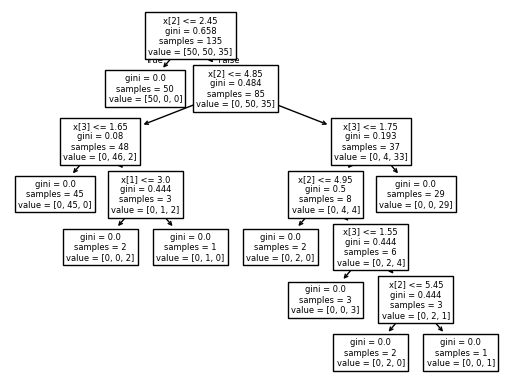

In [17]:
#implementation details at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
tSize=int(X.shape[0]*0.9)
print(tSize)
X_train=X[0:tSize,:]
y_train=y[0:tSize]

X_test=X[tSize:,:]
y_test=y[tSize:]

clf = tree.DecisionTreeClassifier()

#train decision tree on training set
clf = clf.fit(X_train, y_train)

#predict values on testing set
y_pred=clf.predict(X_test);



tree.plot_tree(clf) 
#!pip install graphviz

from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix results:")
print(confusion_matrix(y_test,y_pred))

print("Classification report")
print(classification_report(y_test, y_pred))